In [26]:
# 导入最基本的数据处理工具
import pandas as pd # 导入Pandas数据处理工具包
import numpy as np # 导入NumPy数学计算工具包

In [27]:
df_ads = pd.read_csv('易速鲜花微信软文.csv') # 读入数据
# df_ads.astype(int)
df_ads.head(10) # 显示前几行数据

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401
5,1541,1541.0,7,5,220002
6,827,NaN,5,7,107503
7,866,686.0,5,9,110504
8,1314,1300.0,8,5,229461
9,1431,1099.0,6,5,165004


In [28]:
df_ads.isna().sum() # NaN出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [29]:
df_ads['转发数'].fillna(df_ads['转发数'].mean(), inplace=True) # 用均值补值

/var/folders/s2/tvg6pjgs6b101bwffjt3t99m0000gn/T/ipykernel_20048/4011913053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ads['转发数'].fillna(df_ads['转发数'].mean(), inplace=True) # 用均值补值


In [30]:
df_ads = df_ads.dropna() # 删除NaN值

In [31]:
# 导入数据可视化所需要的库
import matplotlib.pyplot as plt #Matplotlib – Python画图工具库
import seaborn as sns #Seaborn – 统计学数据可视化工具库

/Users/wangchen/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wangchen/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36190 (\N{CJK UNIFIED IDEOGRAPH-8D5E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wangchen/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wangchen/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27983 (\N{CJK UNIFIED IDEOGRAPH-6D4F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wangchen/miniconda3/envs/jupyter_env/

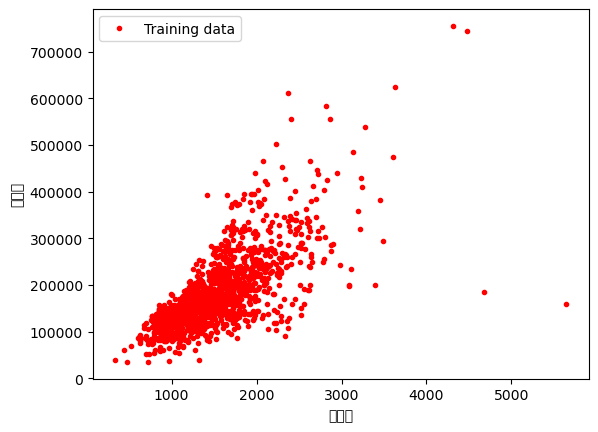

In [33]:
plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='Training data') # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

/Users/wangchen/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wangchen/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wangchen/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wangchen/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wangchen/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 27983 (\N{CJK UNI

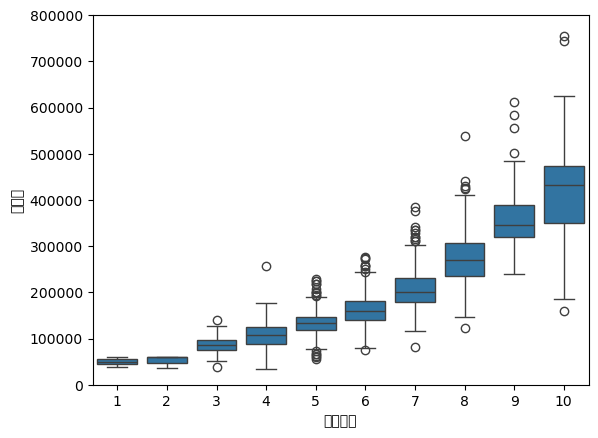

In [34]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标

In [35]:
X = df_ads.drop(['浏览量'],axis=1) # 特征集，Drop掉便签相关字段
y = df_ads.浏览量 # 标签集

In [36]:
X.head() # 显示前几行数据

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [37]:
y.head() # 显示前几行数据

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

In [38]:
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=10)

In [39]:
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
model = LinearRegression() # 使用线性回归算法创建模型

In [40]:
model.fit(X_train, y_train) # 用训练集数据，训练机器，拟合函数，确定参数

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
y_pred = model.predict(X_test) #预测测试集的Y值

In [42]:
df_ads_pred = X_test.copy() #测试集特征数据
df_ads_pred['浏览量真值'] = y_test #测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred #测试集标签预测值
df_ads_pred #显示数据

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
854,1138,588.0,6,8,145003,139464.718252
381,2715,1142.0,8,9,299803,310933.788265
816,2117,1205.0,6,7,237501,222069.782757
577,2414,954.0,5,4,160001,183619.755180
35,1394,1394.0,6,5,159001,188020.171609
...,...,...,...,...,...,...
970,1343,731.0,5,6,154904,123482.628929
598,1506,1362.0,7,5,213491,218803.750036
1058,1048,1048.0,5,5,135004,122968.334652
1018,1080,1084.0,6,5,134004,153642.623509


In [43]:
print("线性回归预测集评分：", model.score(X_test, y_test)) #评估模型
print("线性回归训练集评分：", model.score(X_train, y_train)) #训练集评分

线性回归预测集评分： 0.5704910517016499
线性回归训练集评分： 0.7755916279785805
